In [2]:
from matplotlib import pyplot as plt
from streaming.client import RemoteCamera
import numpy as np

from super_gradients.training import models
from super_gradients.common.object_names import Models

In [24]:
rc = RemoteCamera("192.168.10.125", 9999)

In [25]:
rc.connect()
frame = rc.get_frame()
rc.disconnect()

In [19]:
from segment_anything import SamPredictor, sam_model_registry, SamAutomaticMaskGenerator
from skimage import io
sam = sam_model_registry["vit_b"](checkpoint="../models/sam_vit_b.pth")
predictor = SamPredictor(sam)
mask_generator = SamAutomaticMaskGenerator(sam)

In [26]:
# transform grayscale to HWC
frame = np.repeat(frame[:, :, np.newaxis], 3, axis=2)
masks = mask_generator.generate(frame)

(-0.5, 539.5, 719.5, -0.5)

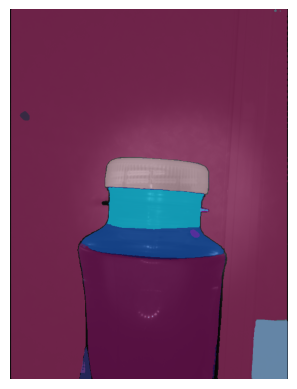

In [27]:
plt.figure()
plt.imshow(frame, cmap='gray')
ax = plt.gca()
ax.set_autoscale_on(False)
polygons = []
color = []
for mask in masks:
    m = mask['segmentation']
    img = np.ones((m.shape[0], m.shape[1], 3))
    color_mask = np.random.random((1, 3)).tolist()[0]
    for i in range(3):
        img[:,:,i] = color_mask[i]
    ax.imshow(np.dstack((img, m*0.5)))
plt.axis("off")